# **Deep Learning and ANN Assignment 1**

## Q1.  Train a Perceptron

*Perceptron is a fundamental building block for neural  networks.*

*Let  us  try  to train  a  single perceptron.*

Consider the data given in the following table. As one can see, it has two attributes x1,x2 and a class label (either 0 or 1).

1. Implement the perceptron training rule and  get  the  appropriate parameters for a single perceptron.

2. Plot the data points  and  the  obtained  decision  boundary.

3. Also  draw  the schematic  diagram  of  the trained perceptron with learned weights. You can draw this on paper and attach a photo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg
from IPython.display import clear_output

In [2]:
X1 = [-3.98,-3.464,-3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]

In [3]:
X2 = [-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]

In [4]:
Y = [1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1]

In [5]:
print('Check for length: ',len(X1) == len(X2) == len(Y))
print('Length equals: ',len(Y))

Check for length:  True
Length equals:  25


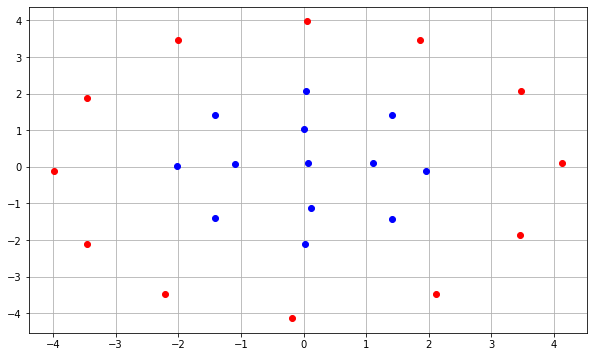

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)

for i,j,k in zip(X1,X2,Y):
    plt.plot(i,j,'ro' if (k == 1.0) else 'bo')

In [7]:
learning_rate = 0.01

In [8]:
W0 = 0
W1 = 0
W2 = 0

In [9]:
iterations = 50

In [10]:
def calculate_loss(i,W0, W1, W2):
  error = 0
  for k in range(25):
    value = W0 + W1 * X1[k] + W2 * X2[k]
    output = 0 if value<0 else 1
    target = Y[k]
    if output != target:
      error += 1 
  if i%10 == 0:
    print('Error after',i,'th iteration is :',error)
    print('W0:',round(W0,3), 'W1:', round(W1,3), 'W2:', round(W2,3))
    print('\n')

In [11]:
i = 0
while i < iterations:
  i = i + 1
  for j in range(25):
    output = W0 + W1 * X1[j] + W2 * X2[j]
    #output = 0 if output<0 else 1
    target = Y[j]
    W0 = W0 + learning_rate * (target - output) 
    W1 = W1 + learning_rate * (target - output) * X1[j]
    W2 = W2 + learning_rate * (target - output) * X2[j]
  calculate_loss(i,W0, W1, W2)

Error after 10 th iteration is : 13
W0: 0.457 W1: 0.044 W2: 0.003


Error after 20 th iteration is : 13
W0: 0.491 W1: 0.042 W2: 0.002


Error after 30 th iteration is : 13
W0: 0.493 W1: 0.042 W2: 0.002


Error after 40 th iteration is : 13
W0: 0.493 W1: 0.042 W2: 0.002


Error after 50 th iteration is : 13
W0: 0.493 W1: 0.042 W2: 0.002




In [12]:
W0 = round(W0,3)
W1 = round(W1,3)
W2 = round(W2,3)
print('W0:',W0,' W1:',W1,' W2:',W2)

W0: 0.493  W1: 0.042  W2: 0.002


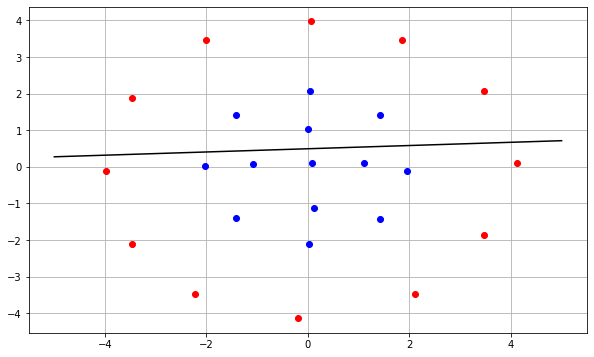

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)

for i,j,k in zip(X1,X2,Y):
    plt.plot(i,j,'ro' if (k == 1.0) else 'bo');

x1 = np.linspace(-5,5,num = 25)
x2 = np.linspace(-5,5,num = 25)
y = W0 + W1 * x1 + W2 * x2

plt.plot(x1, y, 'k');

In [14]:
!gdown --id 12C6_bykfUdc7wdK6R4gn6G_QEgMZqbQe

clear_output()

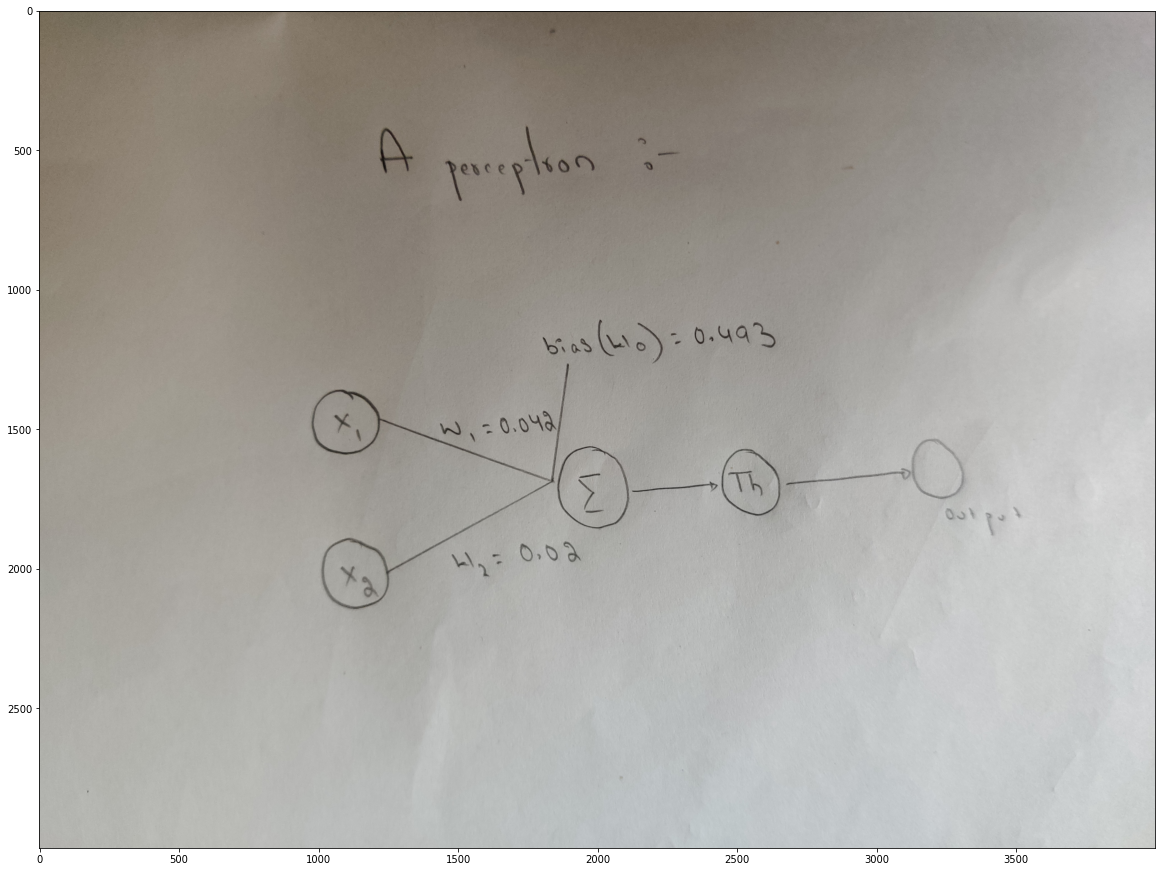

In [15]:
plt.figure(figsize=(20,50))
img = mpimg.imread('/content/perceptron.jpg')
imgplot = plt.imshow(img)

##Q2. Train a Neural Network

*Let us design a neural network to classify flowers from Iris dataset.*

1. Implement a single hidden layer MLP.  Final output layer will have 3
neurons,one for each result. **Arch: [Input, hidden, output]**

2. Now use an NN with two hidden layers. The first hidden layer has 8
neurons.The second hidden layer has 4 neurons. The third hidden layer
has 4 neurons . **Arch: [Input,hidden1,hidden2,hidden3,output]**

    (i)  Use keras or any other framework to design the NN model and train on
    the iris data.

    (ii) Draw  the  schematic diagram of the NN along with all the weights and
    specify a suitable activation function. How many trainable parameters are
    there?

Link for Iris dataset:  https://archive.ics.uci.edu/ml/datasets/iris

In [16]:
import keras

import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

In [17]:
!wget -O 'iris_data' https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

clear_output()

In [18]:
iris_df = pd.read_csv('iris_data',names = ['sepal length','sepal width','petal length','petal width','class'])

In [19]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
label_encoder = LabelEncoder()

In [21]:
iris_df['class_cat'] = label_encoder.fit_transform(iris_df['class'])
iris_df.head()

,sepal length,sepal width,petal length,petal width,class,class_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [22]:
X = iris_df.drop(['class','class_cat'],axis = 1)
y = iris_df['class_cat']

In [23]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_cat, dtype: int64

In [25]:
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

Implement a single hidden layer MLP. Final output layer will have 3 neurons,one for each result. Arch: [Input, hidden, output]

In [26]:
standardscaler = StandardScaler()
X_trainscaled=standardscaler.fit_transform(X_train)
X_testscaled=standardscaler.transform(X_test)

In [27]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9333333333333333


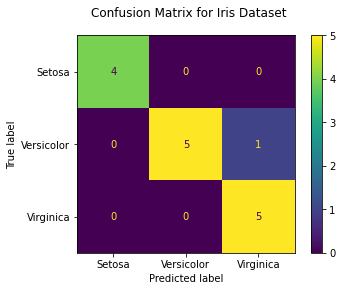

In [28]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

Now use an NN with two hidden layers. The first hidden layer has 8 neurons.The second hidden layer has 4 neurons. The third hidden layer has 4 neurons . Arch: [Input,hidden1,hidden2,hidden3,output]

(i) Use keras or any other framework to design the NN model and train on the iris data.

(ii) Draw the schematic diagram of the NN along with all the weights and specify a suitable activation function. How many trainable parameters are there?


In [29]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
model = Sequential()
model.add(Dense(8, input_dim = 4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation= 'softmax'))

In [31]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
print(X_train.shape)

(135, 4)


In [33]:
print(y_train.shape)

(135, 3)


In [34]:
training_history = model.fit(X_train, y_train, epochs = 50, batch_size= 40)

Epoch 1/50
4/4 [==============================] - 14s 4ms/step - loss: 1.1354 - accuracy: 0.2555
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1241 - accuracy: 0.3237
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1184 - accuracy: 0.3112
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3517
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0839 - accuracy: 0.3608
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0824 - accuracy: 0.3533
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0729 - accuracy: 0.3555
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0687 - accuracy: 0.3513
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0794 - accuracy: 0.3399
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0433 - accuracy: 0.5832
Epoch 11/50
4/4 [=====================

In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 478ms/step - loss: 0.6449 - accuracy: 0.6000


In [36]:
print('Test Accuracy: ', round(test_acc,3), '\nTest Loss: ', round(test_loss,3))

Test Accuracy:  0.6 
Test Loss:  0.645


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


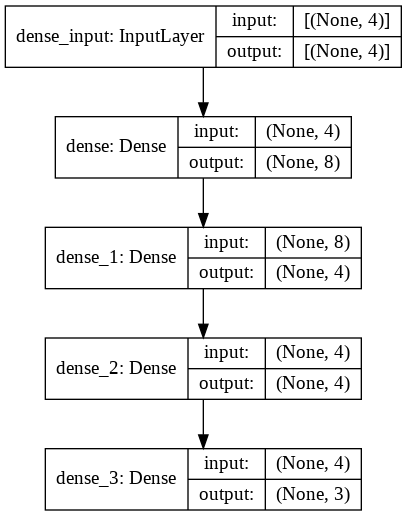

In [38]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [39]:
!gdown --id 12E7zNOQVlG8msBPOTj4ZIcBDZkQvMqur

clear_output()

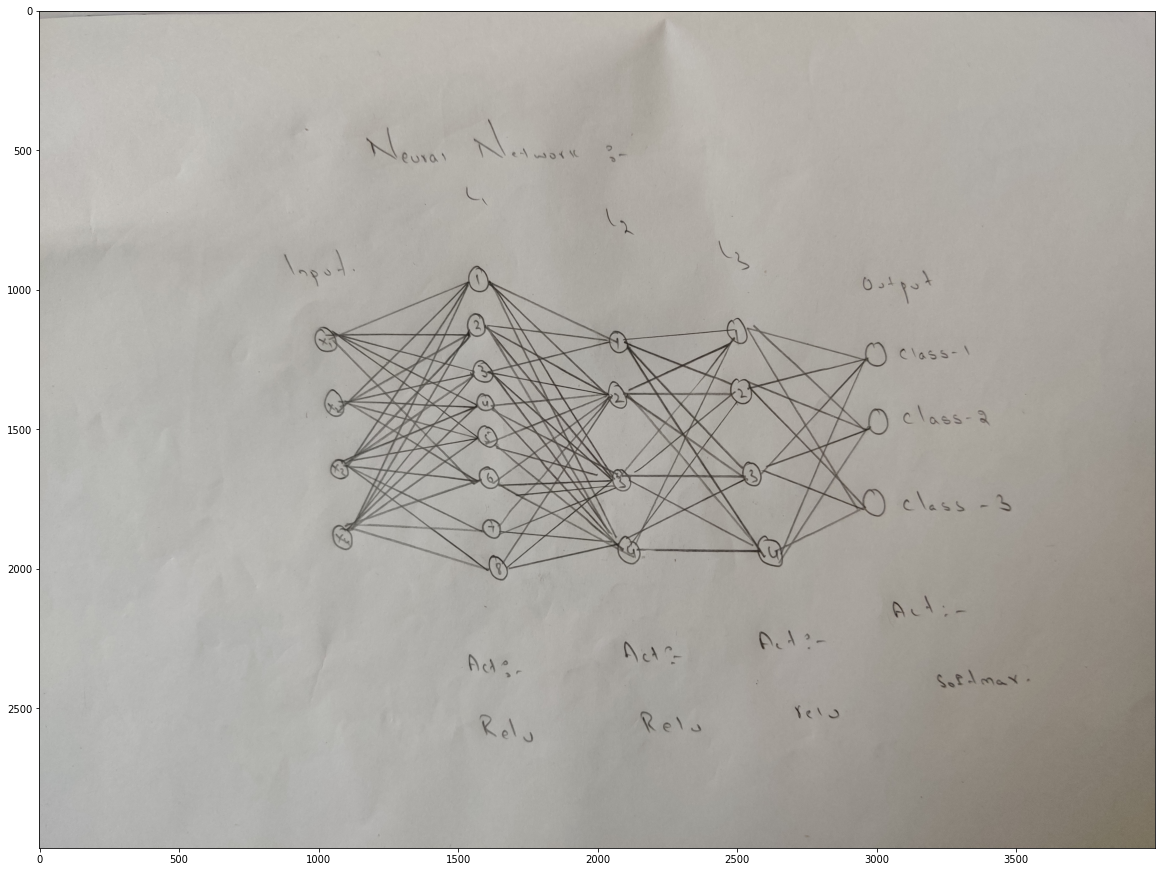

In [40]:
plt.figure(figsize=(20,30))
img = mpimg.imread('/content/Neural_network.jpg')
imgplot = plt.imshow(img)

In [41]:
model.get_weights()

[array([[-0.18862998,  0.410124  , -0.4641924 ,  0.16669549, -0.34609914,
          0.17773835,  0.18397786, -0.54695654],
        [-0.5413752 , -0.53554785,  0.2694537 ,  0.54607487,  0.31599963,
         -0.16299786,  0.335703  ,  0.24886042],
        [ 0.3530298 ,  0.56678987,  0.04398108, -0.6458333 ,  0.31638026,
         -0.25640237, -0.2839771 ,  0.24827915],
        [ 0.37340236,  0.4655509 , -0.6376022 ,  0.57408243,  0.6458191 ,
          0.8249071 ,  0.3023269 , -0.0116725 ]], dtype=float32),
 array([-0.08014058, -0.0982078 ,  0.        ,  0.17161347,  0.0443024 ,
        -0.10976727,  0.11217777,  0.        ], dtype=float32),
 array([[-1.8123064e-04, -1.8768255e-01, -8.3593950e-02,  6.6344482e-01],
        [ 5.6860524e-01,  4.9458772e-01,  7.2043008e-01, -1.5874022e-01],
        [-4.9446598e-01, -5.3350812e-01, -5.4554123e-01,  3.5420972e-01],
        [ 8.5611737e-01, -1.1288429e-01,  4.5280778e-01, -5.4531920e-01],
        [ 2.9224920e-01,  7.4486643e-01,  3.4656221e-01,  